In [1]:
import pandas as pd

import numpy as np

import re

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
ca_da = pd.read_csv("/Users/xugao/Desktop/updated BD/ca_data+analyst_jd9 (1).csv")

skill_set = pd.read_excel("/Users/xugao/Downloads/skils_list (2).xlsx", sheet_name='Skill Set')

In [3]:
skill_set

,Technical Skills,Soft Skills
0,AWS,Communication skills
1,GCP,Collaboration
2,Azure,Detail orientation
3,Cyber security,Troubleshooting
4,SQL,Problem Solving
...,...,...
85,Weka,NaN
86,MATLAB,NaN
87,Google Cloud ML,NaN
88,Amazon Machine Learning,NaN


In [90]:
#ca_ds['jobid']=ca_ds['url'].apply(lambda x : x.split("=")[1])

In [4]:
ca_da_jd = pd.read_csv("/Users/xugao/Desktop/updated BD/ca_data+analyst_jd9 (1).csv")
ca_da_jd

,Unnamed: 0,url,description
0,0,https://ca.indeed.com/viewjob?jk=7a19fe73adae9c11,"Job SummaryThe Data Analyst, under the directi..."
1,1,https://ca.indeed.com/viewjob?jk=b93733d56745cf63,\n\nPosition: IP Procurement Data Analyst co-o...
2,2,https://ca.indeed.com/viewjob?jk=36bc94d6a898d0ec,\nThe Big Data Analyst is a seasoned professio...
3,3,https://ca.indeed.com/viewjob?jk=ef6c647cc4526211,Rubicon Organicsâ mission is to grow the bes...
4,4,https://ca.indeed.com/viewjob?jk=ddd2e22afb325a23,The Role\nYou Will Be Responsible For\n\nDefin...
...,...,...,...
196,196,https://ca.indeed.com/viewjob?jk=731702f9e0c18240,"\nFounded in 1987, Croesus is a WealthTech off..."
197,197,https://ca.indeed.com/viewjob?jk=829a1025b8be5e43,Souhaitez-vous faire partie du paysage dynamiq...
198,198,https://ca.indeed.com/viewjob?jk=19887884938d108a,"\n\nPurpose: Student Counselling, Health & Wel..."
199,199,https://ca.indeed.com/viewjob?jk=959280adc3743e2d,\n\n\n\n\n\n\n\n\n\n\n\n If you are ...


In [6]:
ca_da_jd['jobid']=ca_da_jd['url'].apply(lambda x : x.split("=")[1])

In [7]:
ca_da_jd

,Unnamed: 0,url,description,jobid
0,0,https://ca.indeed.com/viewjob?jk=7a19fe73adae9c11,"Job SummaryThe Data Analyst, under the directi...",7a19fe73adae9c11
1,1,https://ca.indeed.com/viewjob?jk=b93733d56745cf63,\n\nPosition: IP Procurement Data Analyst co-o...,b93733d56745cf63
2,2,https://ca.indeed.com/viewjob?jk=36bc94d6a898d0ec,\nThe Big Data Analyst is a seasoned professio...,36bc94d6a898d0ec
3,3,https://ca.indeed.com/viewjob?jk=ef6c647cc4526211,Rubicon Organicsâ mission is to grow the bes...,ef6c647cc4526211
4,4,https://ca.indeed.com/viewjob?jk=ddd2e22afb325a23,The Role\nYou Will Be Responsible For\n\nDefin...,ddd2e22afb325a23
...,...,...,...,...
196,196,https://ca.indeed.com/viewjob?jk=731702f9e0c18240,"\nFounded in 1987, Croesus is a WealthTech off...",731702f9e0c18240
197,197,https://ca.indeed.com/viewjob?jk=829a1025b8be5e43,Souhaitez-vous faire partie du paysage dynamiq...,829a1025b8be5e43
198,198,https://ca.indeed.com/viewjob?jk=19887884938d108a,"\n\nPurpose: Student Counselling, Health & Wel...",19887884938d108a
199,199,https://ca.indeed.com/viewjob?jk=959280adc3743e2d,\n\n\n\n\n\n\n\n\n\n\n\n If you are ...,959280adc3743e2d


In [10]:
ca_da_id = pd.read_csv("/Users/xugao/Desktop/updated BD/ca_data+analyst_jobids9.csv")
ca_da_id

,Unnamed: 0,jobid,jobid_location
0,0,438e43e2f086e900,"Lajord, SK"
1,1,ffd8877bc76ed677,"Moncton, NB+ 1Â lieu"
2,2,6cc5a97cdb3aa658,"TÃ©lÃ©travail hybride Ã Langley, BC"
3,3,23f033f3c9422772,"Halifax, NS"
4,4,a1f60ba333ead379,"Vancouver, BC"
...,...,...,...
196,521,8abefb22dd7ec27a,"London, ON"
197,522,8c65334ccaf1818d,"Toronto, ON"
198,554,9a1504e2fed873df,"MontrÃ©al, QC"
199,555,4a86eaa48c3ab0dc,"MontrÃ©al, QC"


In [11]:
ca_da_all = pd.merge(ca_da_jd,ca_da_id, on='jobid',how="left")

In [12]:
import unicodedata


def strip_accents(description):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(description, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    description = unicodedata.normalize('NFD', description)
    description = description.encode('ascii', 'ignore')
    description = description.decode("utf-8")
    return str(description)

def cleaner(description):
    description= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", description) 
    
    description = re.sub(r"won\'t", "will not", description) # fix contractions
    description = re.sub(r"can\'t", "can not", description)
    description = re.sub(r"n\'t", " not", description)
    description = re.sub(r"\'re", " are", description)
    description = re.sub(r"\'s", " is", description)
    description = re.sub(r"\'d", " would", description)
    description = re.sub(r"\'ll", " will", description)
    description = re.sub(r"\'t", " not", description)
    description = re.sub(r"\'ve", " have", description)
    description = re.sub(r"\'m", " am", description)
    
    #description = re.sub(r"[^a-zA-z]", " ", description) 
    description = re.sub("(^|\W)\d+($|\W)", " ", description)  
    description= re.sub('\W+',' ',description)
    description = re.sub(r"\s+", " ", description) 
    description = description.lower()  
    description = description.strip()
    description = re.sub('string.punctuation',' ',description)
    description = re.sub(r"Ã","A",description)
    description = re.sub(r"ã","a",description)
    
    return description

ca_da_all['description_clean'] = ca_da_all['description'].apply(cleaner)

In [22]:
#ca_da_all['joblocation_clean']=ca_da_all['jobid_location'].apply(strip_accents)

In [13]:
# clean on jobid location

ca_da_all['joblocation_clean']=ca_da_all['jobid_location'].apply(cleaner)

In [199]:
ca_da_all['joblocation_clean'].value_counts()

#TÃ©lÃ©travail hybride Ã  Toronto, ON - Job is based out of Toronto, is hybrid, and is remote
#TÃ©lÃ©travail Ã  Edmonton, AB - Job is based out of Edmonton, is not hybrid, and is remote
#TÃ©lÃ©travail - job is remote


##if travail is followed by the word hybrid-- hybrid
## travail is followed by space or "-" , as long as not followed by hybrid, its remote

toronto on                             38
montra al qc                           17
calgary ab                             13
vancouver bc                            6
mississauga on                          6
                                       ..
london on                               1
ireland on                              1
vancouver bc location                   1
ta la travail hybride a langley bc      1
ta la travail a waterloo on 1â lieu     1
Name: joblocation_clean, Length: 84, dtype: int64

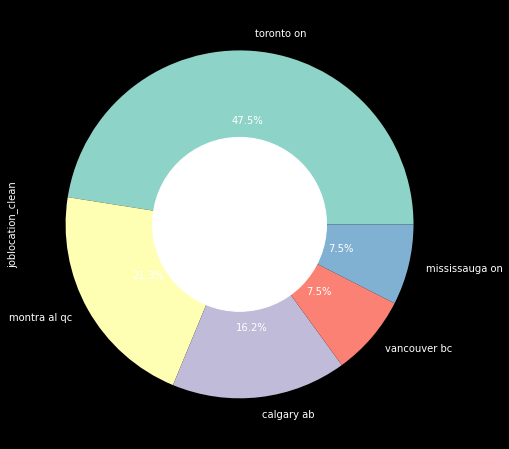

In [141]:
plt.figure(figsize=(10,8))
ca_da_all["joblocation_clean"].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 

# display the plot
plt.show()

In [161]:
## extract htbrid and remote info from jobid_location and create a new column
# remote and travail are both remote, replace travil with remote


from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

Hybride_remote= ['travail hybride','remote','travail']

ca_da_all["Hybride_remote"]=''

for i in Hybride_remote:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_da_all)):
    
    keywords_found = keyword_processor.extract_keywords(ca_da_all["joblocation_clean"][i])

    ca_da_all['Hybride_remote'][i]=keywords_found

<ipython-input-161-e9ca10b4e097>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all['Hybride_remote'][i]=keywords_found


In [162]:
# reomve square bracket
ca_da_all['Hybride_remote']=ca_da_all['Hybride_remote'].astype(str).str.replace("[\]\[]",'')

ca_da_all['Hybride_remote'] = ca_da_all['Hybride_remote'].str.replace('travail','remote',regex=True)

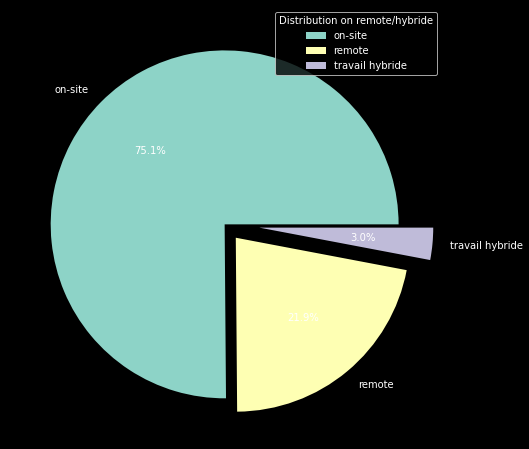

In [167]:
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
x=ca_da_all['Hybride_remote'].value_counts()


labels = ['on-site','remote','travail hybride']
plt.pie(x, explode=[0.0,0.1,0.2], autopct='%1.1f%%',labels=labels)
plt.legend(title = "Distribution on remote/hybride")

In [87]:
# remove punctuation

import string
from nltk.corpus import stopwords

print(string.punctuation)

# remove puctuation in location
text = ca_ds_all['joblocation_clean']
ca_ds_all['joblocation_clean_pun']="".join([char for char in text if char not in string.punctuation])

def remove_stopwords(text):
    
    text = ca_ds_jd["description_clean_puc"]
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


ca_ds_jd["description_stop_re"] = ca_ds_jd["description_clean_puc"].apply(lambda text: remove_stopwords(text))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


NameError: name 'ca_ds_all' is not defined

In [ ]:
!pip install nltk

In [13]:
import nltk

from nltk.stem import WordNetLemmatizer

lemmatizer = nltk.stem.WordNetLemmatizer()


ca_ds_jd["description_lemma"] = ca_ds_jd["description_tokenized"].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [ ]:
conda install -c conda-forge flashtext

In [ ]:
#!pip install flashtext

In [155]:
# extract technical skills 

from flashtext import KeywordProcessor


keyword_processor = KeywordProcessor()


tech_skill = skill_set.iloc[:,0].to_list()


ca_da_all["tech_skill"]=''

for i in tech_skill:
    
    if i != i:
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][0])


for i in range(len(ca_da_all)):
    
    keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][i])
    
    ca_da_all["tech_skill"][i] = keywords_found

<ipython-input-155-d85300f7e29c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all["tech_skill"][i] = keywords_found


In [ ]:
!pip install compiler

In [156]:
# convert nested list single list 
# summarize the frequencey of each teck skills

from nltk import flatten

uniqueskillcount=0
    
tech_skill_list =[i for i in ca_da_all["tech_skill"]]
    
tech_skill = list(flatten([q for q in tech_skill_list]))



tech_skill_count={}

for w in tech_skill:
    
    if w in tech_skill_count:
        
        tech_skill_count[w] += 1
    else:
        
        tech_skill_count[w] = 1

In [158]:
print(tech_skill_count)

{'SQL': 176, 'Python': 99, 'Tableau': 69, 'Power BI': 57, 'Java': 13, 'C': 34, 'MySQL': 7, 'Hive': 7, 'Scala': 4, 'PHP': 1, 'JavaScript': 10, 'Azure': 23, 'Spark': 15, 'R': 120, 'SQL Server': 13, 'Deployment': 11, 'MATLAB': 7, 'NoSQL': 7, 'Hadoop': 12, 'AWS': 11, 'XML': 3, 'SaaS': 7, 'Git': 4, 'Pytorch': 1, 'Tensorflow': 1, 'Cassandra': 1, 'GCP': 4, 'Linux': 3, 'Docker': 1, 'Kubernetes': 2, 'Kafka': 2, 'SOAP': 1, 'HDFS': 2, 'Redshift': 2, 'Mongodb': 2}


In [157]:
# convert dictionary soft skill list to dataframe type


skill_items = list(tech_skill_count.items())

skill_list = pd.DataFrame(skill_items)

skill_list= skill_list.rename(columns={0:"tech skill",1:"count"}).reset_index().sort_values(by="count",ascending=False)


skill_list.drop(columns="index")

,tech skill,count
0,SQL,176
13,R,120
1,Python,99
2,Tableau,69
3,Power BI,57
5,C,34
11,Azure,23
12,Spark,15
4,Java,13
14,SQL Server,13


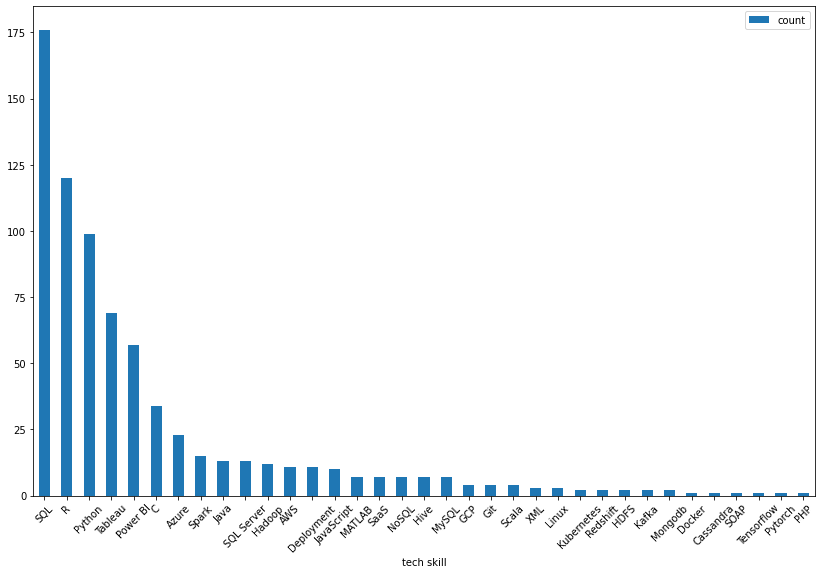

In [159]:
skill_list.plot.bar(x="tech skill", y="count", figsize=(14,9), rot=45)

In [160]:
# extract soft skills


from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

soft_skill = skill_set.iloc[:,1].to_list()

# keyword_processor.add_keyword(keyword_names)


ca_da_all['soft_skill']=''

for i  in soft_skill:
    
    if i != i:
        
        pass 
    
    else:
         
        keyword_processor.add_keyword(i)
    
keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][0])

for i in range(len(ca_da_all)):
    
    keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][i])
    
    ca_da_all['soft_skill'][i]=keywords_found
    

<ipython-input-160-1ca4d58a0a42>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all['soft_skill'][i]=keywords_found


In [161]:
from nltk import flatten

#def count_soft_skill(x):
    
uniqueskillcount=0
    
soft_skill_list =[i for i in ca_da_all["soft_skill"]]
    
soft_skill = list(flatten([q for q in soft_skill_list]))



soft_skill_count={}

for w in soft_skill:
    
    if w in soft_skill_count:
        
        soft_skill_count[w] += 1
    else:
        
        soft_skill_count[w] = 1

In [162]:
# convert dictionary soft skill list to dataframe type


skill_items = list(soft_skill_count.items())

skill_list = pd.DataFrame(skill_items)

skill_list= skill_list.rename(columns={0:"soft skill",1:"count"}).reset_index().sort_values(by="count", ascending=False)


skill_list.drop(columns="index")

,soft skill,count
1,Communication skills,93
4,Communication,82
6,Problem Solving,64
2,Leadership,61
14,Collaboration,52
8,Interpersonal Skills,22
0,Time Management,21
5,Critical Thinking,19
7,Team Player,19
9,Ownership,15


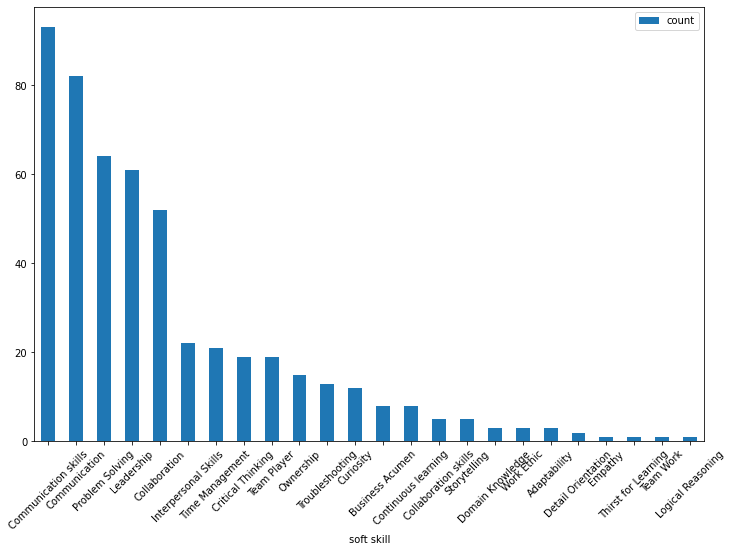

In [163]:
skill_list.plot.bar(x="soft skill", y="count", figsize=(12,8), rot=45)

In [200]:
# extract degree info and create a new column

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

EDUCATION = [
            'BE','B.E.', 'B.E', 'BS', 'B.S','C.A.','c.a.','B.Com','B. Com','M. Com', 'M.Com','M. Com .',
            'ME', 'M.E', 'M.E.', 'MS', 'M.S','msc',
            'BTECH', 'B.TECH', 'M.TECH', 'MTECH',
            'PHD', 'phd', 'ph.d', 'Ph.D.','MBA','mba','graduate', 'post-graduate','5 year integrated masters','masters',
            'SSC', 'HSC', 'CBSE', 'ICSE', 'X', 'XII'
        ]

ca_da_all["education"]=''

for i in EDUCATION:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_da_all)):
    
    keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][i])

    ca_da_all['education'][i]=keywords_found
    

<ipython-input-200-7ebc726417df>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all['education'][i]=keywords_found


In [201]:
# remove duplicate degree information in each position and remove "set()"


education_result=[]

for i in range(len(ca_da_all["education"])):
    
    
      item = set(ca_da_all["education"][i])
        
      for char in item:
    
            if item != "set()":
      
               education_result.append(item)

In [202]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


degree_count = {}

for w in education_result:
    
    for char in w:
    
        if char in degree_count:
        
             degree_count[char] += 1
        
        else:
        
              degree_count[char] = 1

In [126]:
degree_count

{'graduate': 23,
 'BE': 224,
 'MS': 68,
 'ME': 21,
 'X': 8,
 'mba': 5,
 'masters': 5,
 'BS': 8}

In [203]:
# convert dictionary degreelist to dataframe type


degree_items = list(degree_count.items())

ca_da_degree_list = pd.DataFrame(degree_items)

ca_da_degree_list= ca_da_degree_list.rename(columns={0:"degree",1:"count"}).reset_index().sort_values(by="count", ascending=False)


ca_da_degree_list.drop(columns="index")

,degree,count
2,BE,224
0,MS,68
1,graduate,23
3,ME,21
4,X,8
7,BS,8
5,mba,5
6,masters,5


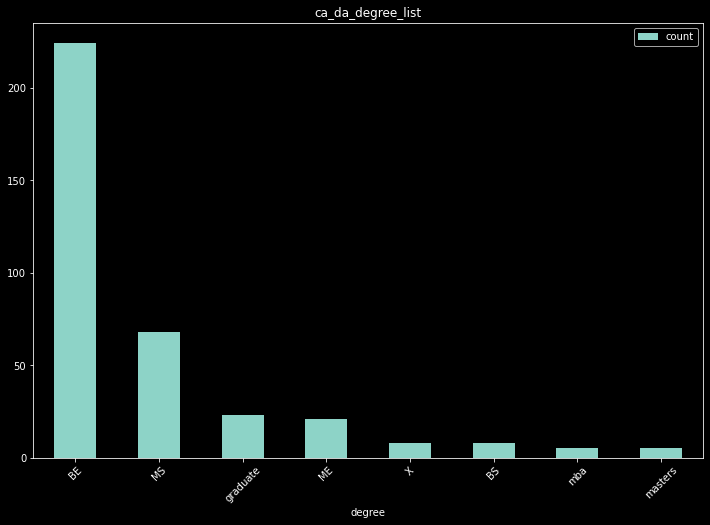

In [208]:
# plot the degree count 
plt.style.use('dark_background')
ca_da_degree_list.plot.bar(x="degree", y="count", figsize=(12,8), rot=45,title="ca_da_degree_list" )

In [74]:
# major distribution

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

major = ["computer science", "statistics", "mathematics", "physics", "electrical engineering", "economics","computer engineering",
        "information systems","business", "management science", "mechanical engineering", "chemistry", "finance", "biology","psychology","Engineering",
        "information technology","industrial engineering","biomedical engineering","chemical engineering"]



ca_da_all["major"] = ''

for i in major:
    
    if i !=i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        

        
for i  in range(len(ca_da_all["description_clean"])):
    
    
    keyword_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][i])
    
    
    ca_da_all['major'][i] = keyword_found

<ipython-input-74-d915e5d3ff07>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all['major'][i] = keyword_found


In [75]:
# remove duplicate major information in each position and remove "set()"


major_result=[]

for i in range(len(ca_da_all["major"])):
    
    
    item = set(ca_da_all["major"][i])
        
    for char in item:
    
            if item != "set()":
      
               major_result.append(item)

In [76]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


major_count = {}

for w in major_result:
    
    for char in w:
    
        if char in major_count:
        
             major_count[char] += 1
        
        else:
        
              major_count[char] = 1

In [25]:
major_count

{'computer science': 575,
 'statistics': 531,
 'Engineering': 570,
 'information technology': 41,
 'business': 648,
 'mathematics': 421,
 'physics': 156,
 'finance': 66,
 'industrial engineering': 8,
 'information systems': 29,
 'economics': 147,
 'computer engineering': 37,
 'biology': 16,
 'psychology': 14,
 'chemistry': 10,
 'chemical engineering': 10,
 'electrical engineering': 4}

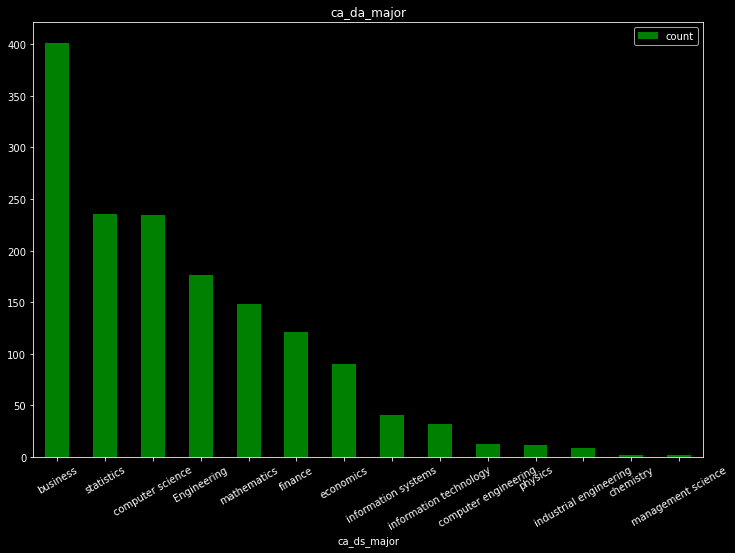

In [81]:
# conver major count dictionary to datarame

major_items = list(major_count.items())

major_list = pd.DataFrame(major_items)


ca_da_major_list= major_list.rename(columns={0:"ca_ds_major",1:"count"}).reset_index().sort_values(by="count",ascending=False)


ca_da_major_list=ca_da_major_list.drop(columns="index")
plt.style.use('dark_background')
ca_da_major_list.plot.bar(x="ca_ds_major",y="count",figsize=(12,8),rot=30,color='green',title="ca_da_major")

## Extracting Experience of Years-Method One

In [104]:
tech_skills = skill_set.iloc[:,0].to_list()
soft_skills = skill_set.iloc[:,1].to_list()

In [28]:
# alternative method of extracting years of experience--worked!!!
# Function one
import re
from collections import defaultdict


def extract_skills_experience(job_descriptions):
    
    tech_skill = list(flatten([q for q in tech_skill_list]))
    soft_skill = list(flatten([q for q in soft_skill_list]))
    
    
    skills_experience = defaultdict(list)
    
    pattern = r"(\d+(?:\.\d+)?)\s*(?:year|yrs?)\s*(?:of\s*)?[\w\s]*?(?:experience|exp|exp\.)?.*?([a-zA-Z\s]+)"
    
    for description in job_descriptions:
        
        matches = re.findall(pattern, description, re.IGNORECASE)
        
             
        for match in matches:
            
            experience, skills = match
            
            for skill in skills.split():
                 #convert the skill name to lowercase to ensure consistency
                
                if skill in tech_skill:
                
                    skill = skill.lower()
                
                    skills_experience[skill].append(float(experience))
                
                elif skill in soft_skill:
                  
                    
                    skill = skill.lower()
                
                    skills_experience[skill].append(float(experience))
                    
                else:
                    
                    pass
                
    return dict(skills_experience)

In [29]:
## function two

def extract_skills_experience(job_descriptions, tech_skills, soft_skills):
    
    skills_experience = defaultdict(list)
    
    pattern = r"(\d+(?:\.\d+)?(?:\+)?(?:\-)?\d*)\s*(?:year|yrs?)[s]?\s*(?:of\s*)?[\w\s]*?(?:Experience|experience|exp|exp\.)?.*?([a-zA-Z\s\,]+)"
    for description in job_descriptions:
        matches = re.findall(pattern, description, re.IGNORECASE)
        for match in matches:
            experience, skills = match
            for skill in re.split(r'[\s,]+', skills.lower()):
                if skill in tech_skills:
                    skills_experience[skill].append(float(experience))
                elif skill in soft_skills:
                    skills_experience[skill].append(float(experience))
                else:
                    pass
                
    return dict(skills_experience) 

In [30]:
job_descriptions = [
    "7 years of experience with Python and R, 3.5 years of experience with Tableau",
    "5 yrs of exp in R and python, 2 years of experience with SQL",
    "Experience: Python, R, SQL - 5 yrs",
    "3 years of exp. with PYTHON"
]


#job_descriptions_new = [i.lower().strip() for i in job_descriptions]
#job_descriptions_new 

skills_experience = extract_skills_experience(job_descriptions, tech_skills, soft_skills)
print(skills_experience)


NameError: name 'tech_skills' is not defined

In [31]:
job_descriptions = "7 years of experience with Python and R, 3.5 years of experience with Tableau,5 yrs of exp in R and python, 2 years of experience with SQL,3 years of exp. with PYTHON."

type(job_descriptions)

str

## Extract remote positions


In [61]:
from nltk import word_tokenize
#text = """Unlike India, A winter weather advisory remains in effect line from Blue Earth, to Red Wing line in Minnesota,BC,
#Alberta,California,Washington,Seattle,Los Angeles,San Francisco."""

text_1=''.join(str(e) for e in ca_ds_jd['description_clean'][:-1])

# pos_tagging, word_tokenize, name entity recognition
    
tokenized_doc  = word_tokenize(text_1)

if not isinstance(text_1, str):
    
    raise TypeError("expected string or bytes-like object")

tagged_sentences = nltk.pos_tag(tokenized_doc)

NE= nltk.ne_chunk(tagged_sentences)
#NE.draw()


In [60]:
# extract named entity

#def extract_locations(x):
    
named_entities = []

for tagged_tree in NE:
    
       #print(tagged_tree)
        
       if hasattr(tagged_tree, 'label'):
    
          entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) 
        
          entity_type = tagged_tree.label() # get NE category
            
          named_entities.append((entity_name, entity_type))
            
          for tag in named_entities:
      #print(tag[1])
                if tag[1]=='GPE':   #Specify any tag which is required
                     print(tag)
                
                          
#print(named_entities)

In [44]:
# extract only GPE tags

for tag in named_entities:
    
      #print(tag[1])
      if tag[1]=='GPE':   #Specify any tag which is required
        print(tag)

In [ ]:
conda install -c conda-forge spacy-model-en_core_web_lg

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - spacy-model-en_core_web_lg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    spacy-model-en_core_web_lg-3.1.0|     pyhd8ed1ab_0       630.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       630.6 MB

The following NEW packages will be INSTALLED:

  spacy-model-en_co~ conda-forge/noarch::spacy-model-en_core_web_lg-

## What sector of companies uses which libraries?


In [78]:
 # extract libraries for ca_data scientist

from flashtext import KeywordProcessor


keyword_processor = KeywordProcessor()


ds_libraries = ['NumPy','Keras','Pandas','PyTorch','SciPy','Scikit-Learn','TensorFlow','Matplotlib','Seaborn',
'Theano','OpenCV','Mahotas','SimpleITK','Pillow','Requests','Beautiful Soup','Selenium','ScraPy','PyTest','PyUnit']



ca_da_all["libraries"]=''

for i in ds_libraries:
    
    if i != i:
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_cloud["description_stop_re"][0])


for i in range(len(ca_da_all)):
    
    keywords_found = keyword_processor.extract_keywords(ca_da_all["description_clean"][i])
    
    ca_da_all["libraries"][i] = keywords_found
    

<ipython-input-78-12d83443ed10>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da_all["libraries"][i] = keywords_found


In [79]:
from nltk import flatten

uniqueskillcount=0
    
library_skill_list =[i for i in ca_da_all["libraries"]]
    
library_skill = list(flatten([q for q in library_skill_list]))



library_skill_count={}

for w in library_skill:
    
    if w in library_skill_count:
        
        library_skill_count[w] += 1
    else:
        
        library_skill_count[w] = 1
        
    

# convert dictionary soft skill list to dataframe type
library_items = list(library_skill_count.items())

library_list = pd.DataFrame(library_items)

cada_library_list= library_list.rename(columns={0:"library skill",1:"count"}).reset_index().sort_values(by="count",ascending=False)

cada_library_list.drop(columns="index")

,library skill,count
2,Requests,54
1,NumPy,4
0,Pandas,3
3,OpenCV,1
4,Matplotlib,1
5,SciPy,1
6,PyTorch,1
7,TensorFlow,1


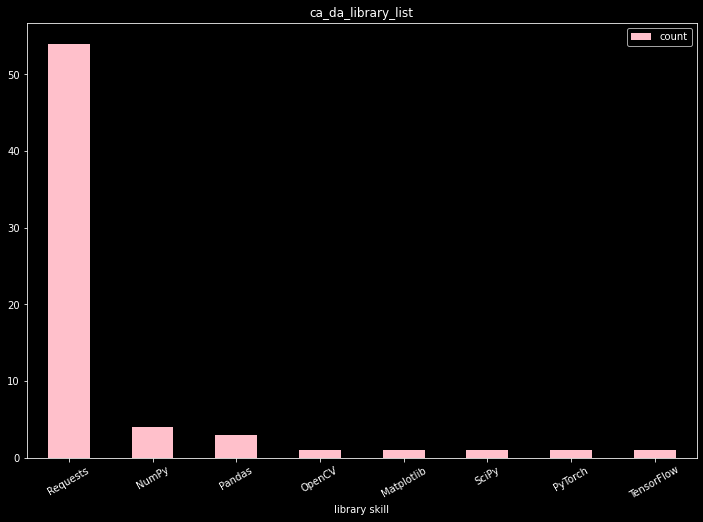

In [80]:
plt.style.use('dark_background')
cada_library_list.plot.bar(x="library skill",y="count",figsize=(12,8),rot=30,color='pink',title="ca_da_library_list")

In [169]:
ca_ds_jd=pd.read_csv("/users/xugao/Desktop/updated BD/ca_data+scientist_jd9 copy.csv")
ca_ds_id=pd.read_csv("/users/xugao/Desktop/updated BD/ca_data_scientist_jobids9.csv")

In [170]:
ca_ds_jd['jobid']=ca_ds_jd["url"].apply(lambda x : x.split("=")[1])

ca_ds = pd.merge(ca_ds_jd,ca_ds_id,on='jobid',how='left')

In [171]:
def cleaner(description):
    description= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", description) 
    
    description = re.sub(r"won\'t", "will not", description) # fix contractions
    description = re.sub(r"can\'t", "can not", description)
    description = re.sub(r"n\'t", " not", description)
    description = re.sub(r"\'re", " are", description)
    description = re.sub(r"\'s", " is", description)
    description = re.sub(r"\'d", " would", description)
    description = re.sub(r"\'ll", " will", description)
    description = re.sub(r"\'t", " not", description)
    description = re.sub(r"\'ve", " have", description)
    description = re.sub(r"\'m", " am", description)
    
    #description = re.sub(r"[^a-zA-z]", " ", description) 
    description = re.sub("(^|\W)\d+($|\W)", " ", description)  
    description= re.sub('\W+',' ',description)
    description = re.sub(r"\s+", " ", description) 
    description = description.lower()  
    description = description.strip()
    description = re.sub(r"Ã","A",description)
    description = re.sub(r"ã","a",description)
    
    return description

ca_ds['description_clean'] = ca_ds['description'].apply(cleaner)
ca_ds['joblocation_clean'] = ca_ds['jobid_location'].apply(cleaner)

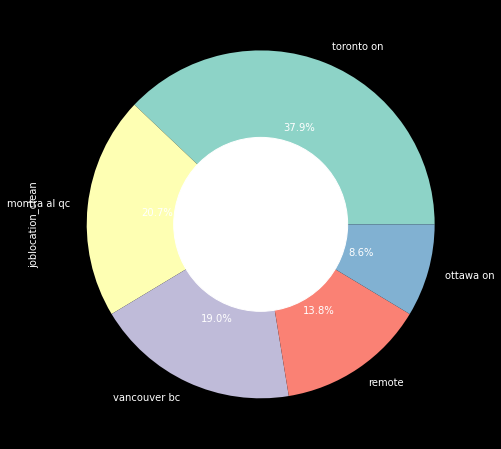

In [172]:
plt.figure(figsize=(10,8))
ca_ds["joblocation_clean"].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 
# display the plot
plt.show()

In [173]:
## extract htbrid and remote info from jobid_location and create a new column
# remote and travail are both remote


from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

Hybride_remote= [
            'travail hybride','remote','travail']

ca_ds["Hybride_remote"]=''

for i in Hybride_remote:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_ds)):
    
    keywords_found = keyword_processor.extract_keywords(ca_ds["joblocation_clean"][i])

    ca_ds['Hybride_remote'][i]=keywords_found
    

<ipython-input-173-8aa7093d6b0a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_ds['Hybride_remote'][i]=keywords_found


In [174]:
# reomve square bracket
ca_ds['Hybride_remote']=ca_ds['Hybride_remote'].astype(str).str.replace("[\]\[]",'')

ca_ds['Hybride_remote'] = ca_ds['Hybride_remote'].str.replace('travail','remote',regex=True)

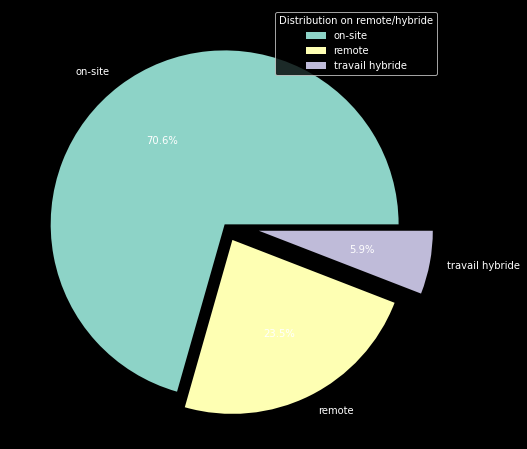

In [175]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))

x=ca_ds['Hybride_remote'].value_counts()

labels = ['on-site','remote','travail hybride']
plt.pie(x, explode=[0.0,0.1,0.2], autopct='%1.1f%%',labels=labels)
plt.legend(title = "Distribution on remote/hybride")



In [13]:
# extract degree info and create a new column

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

EDUCATION = [
            'BE','B.E.', 'B.E', 'BS', 'B.S','C.A.','c.a.','B.Com','B. Com','M. Com', 'M.Com','M. Com .',
            'ME', 'M.E', 'M.E.', 'MS', 'M.S','msc',
            'BTECH', 'B.TECH', 'M.TECH', 'MTECH',
            'PHD', 'phd', 'ph.d', 'Ph.D.','MBA','mba','graduate', 'post-graduate','5 year integrated masters','masters',
            'SSC', 'HSC', 'CBSE', 'ICSE', 'X', 'XII'
        ]

ca_ds["education"]=''

for i in EDUCATION:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_ds)):
    
    keywords_found = keyword_processor.extract_keywords(ca_ds["description_clean"][i])

    ca_ds['education'][i]=keywords_found
    

<ipython-input-13-895248f15a7f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_ds['education'][i]=keywords_found


In [14]:
# remove duplicate degree information in each position and remove "set()"


education_result=[]

for i in range(len(ca_ds["education"])):
    
    
      item = set(ca_ds["education"][i])
        
      for char in item:
    
            if item != "set()":
      
               education_result.append(item)

In [15]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


degree_count = {}

for w in education_result:
    
    for char in w:
    
        if char in degree_count:
        
             degree_count[char] += 1
        
        else:
        
              degree_count[char] = 1

In [16]:
# convert dictionary degreelist to dataframe type


degree_items = list(degree_count.items())

degree_list = pd.DataFrame(degree_items)

degree_list= degree_list.rename(columns={0:"degree",1:"count"}).reset_index().sort_values(by="count", ascending=False)


degree_list.drop(columns="index")

,degree,count
1,BE,195
3,phd,92
0,msc,58
2,MS,49
5,graduate,35
8,BS,22
4,masters,18
6,ME,11
7,X,8


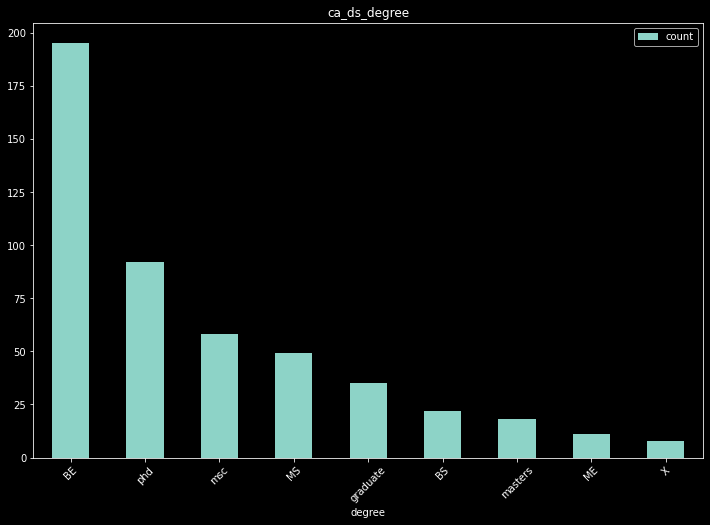

In [17]:
# plot the degree count 

degree_list.plot.bar(x="degree", y="count", figsize=(12,8), rot=45,title='ca_ds_degree')

In [18]:
# major distribution

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

major = ["computer science", "statistics", "mathematics", "physics", "electrical engineering", "economics","computer engineering",
        "information systems","business", "management science", "mechanical engineering", "chemistry", "finance", "biology","psychology","Engineering",
        "information technology","industrial engineering","biomedical engineering","chemical engineering"]



ca_ds["major"] = ''

for i in major:
    
    if i !=i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        

        
for i  in range(len(ca_ds["description_clean"])):
    
    
    keyword_found = keyword_processor.extract_keywords(ca_ds["description_clean"][i])
    
    
    ca_ds['major'][i] = keyword_found


<ipython-input-18-0b12ddd84a80>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_ds['major'][i] = keyword_found


In [19]:
# remove duplicate major information in each position and remove "set()"


major_result=[]

for i in range(len(ca_ds["major"])):
    
    
    item = set(ca_ds["major"][i])
        
    for char in item:
    
            if item != "set()":
      
               major_result.append(item)

In [20]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


major_count = {}

for w in major_result:
    
    for char in w:
    
        if char in major_count:
        
             major_count[char] += 1
        
        else:
        
              major_count[char] = 1

In [21]:
# conver major count dictionary to datarame

major_items = list(major_count.items())

major_list = pd.DataFrame(major_items)


major_list= major_list.rename(columns={0:"ca_ds_major",1:"count"}).reset_index().sort_values(by="count",ascending=False)


major_list=major_list.drop(columns="index")

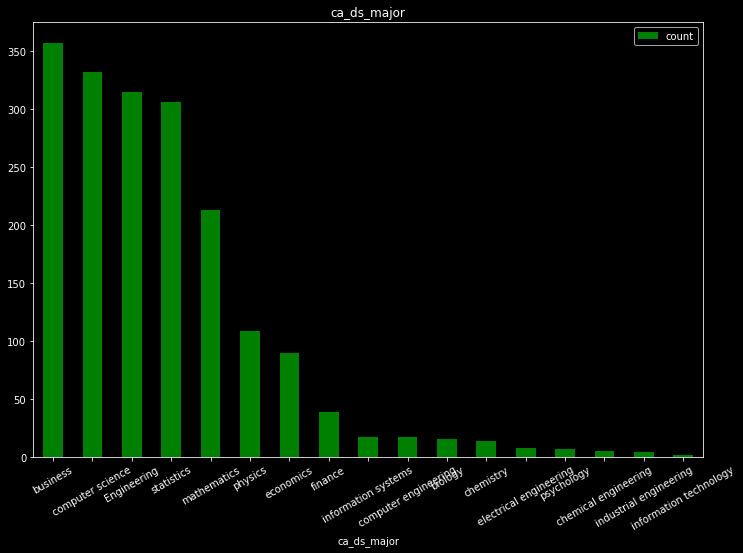

In [22]:
major_list.plot.bar(x="ca_ds_major",y="count",figsize=(12,8),rot=30,title='ca_ds_major',color='green')

In [23]:
 # extract libraries for ca_data scientist

from flashtext import KeywordProcessor


keyword_processor = KeywordProcessor()


ds_libraries = ['NumPy','Keras','Pandas','PyTorch','SciPy','Scikit-Learn','TensorFlow','Matplotlib','Seaborn',
'Theano','OpenCV','Mahotas','SimpleITK','Pillow','Requests','Beautiful Soup','Selenium','ScraPy','PyTest','PyUnit']



ca_ds["libraries"]=''

for i in ds_libraries:
    
    if i != i:
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_cloud["description_stop_re"][0])


for i in range(len(ca_ds)):
    
    keywords_found = keyword_processor.extract_keywords(ca_ds["description_clean"][i])
    
    ca_ds["libraries"][i] = keywords_found
    

<ipython-input-23-d99a4620cddb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_ds["libraries"][i] = keywords_found


In [25]:
from nltk import flatten

uniqueskillcount=0
    
library_skill_list =[i for i in ca_ds["libraries"]]
    
library_skill = list(flatten([q for q in library_skill_list]))



library_skill_count={}

for w in library_skill:
    
    if w in library_skill_count:
        
        library_skill_count[w] += 1
    else:
        
        library_skill_count[w] = 1
        
    

# convert dictionary soft skill list to dataframe type
library_items = list(library_skill_count.items())

library_list = pd.DataFrame(library_items)

library_list= library_list.rename(columns={0:"library skill",1:"count"}).reset_index().sort_values(by="count",ascending=False)

library_list.drop(columns="index")

,library skill,count
1,TensorFlow,38
0,PyTorch,26
6,Pandas,19
4,NumPy,16
3,Keras,15
2,Requests,11
5,SciPy,7
8,Matplotlib,6
7,OpenCV,4
10,Seaborn,3


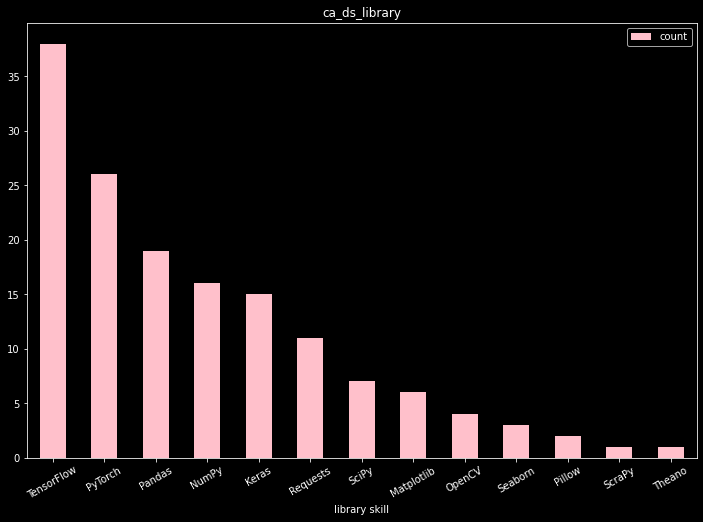

In [26]:
library_list.plot.bar(x="library skill",y="count",figsize=(12,8),rot=30,color='pink',title='ca_ds_library')

In [184]:
ca_ml_jd= pd.read_csv("/Users/xugao/Desktop/updated BD/ca_machine+learning+engineer_jd9.csv")
ca_ml_id=pd.read_csv("/Users/xugao/Desktop/updated BD/ca_machine+learning+engineer_jobids9.csv")

ca_ml_jd['jobid']=ca_ml_jd['url'].apply(lambda x: x.split("=")[1])
ca_ml=pd.merge(ca_ml_jd,ca_ml_id, on='jobid',how='left')

In [117]:
def cleaner(description):
    #description= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", description) 
    
    description = re.sub(r"won\'t", "will not", description) # fix contractions
    description = re.sub(r"can\'t", "can not", description)
    description = re.sub(r"n\'t", " not", description)
    description = re.sub(r"\'re", " are", description)
    description = re.sub(r"\'s", " is", description)
    description = re.sub(r"\'d", " would", description)
    description = re.sub(r"\'ll", " will", description)
    description = re.sub(r"\'t", " not", description)
    description = re.sub(r"\'ve", " have", description)
    description = re.sub(r"\'m", " am", description)
    
    description = re.sub(r"[^a-zA-z]", " ", description) 
    description = re.sub("(^|\W)\d+($|\W)", " ", description)  
    description= re.sub('\W+',' ',description)
    description = re.sub(r"\s+", " ", description) 
    description = description.lower()  
    description = description.strip() 
    description = re.sub(r"Ã","A",description)
    description = re.sub(r"ã","a",description)
    
    return description

In [104]:
ca_ml["jobidlocation_clean"]=ca_ml["jobid_location"].apply(cleaner)
ca_ml['description_clean']=ca_ml['description'].apply(cleaner)

TypeError: expected string or bytes-like object

In [185]:
# remove punctuation

import string
from nltk.corpus import stopwords


# remove puctuation in location
text = ca_ml['jobidlocation_clean']
ca_ml['jobidlocation_clean_pun']="".join([char for char in text if char not in string.punctuation])

KeyError: 'jobidlocation_clean'

In [ ]:
def remove_stopwords(text):
    
    text = ca_ml["description_clean_puc"]
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


ca_ml["description_stop_re"] = ca_ml["description_clean_puc"].apply(lambda text: remove_stopwords(text))

In [176]:
ca_de_jd=pd.read_csv("/Users/xugao/Desktop/updated BD/ca_data+engineer_jd9.csv")
ca_de_id=pd.read_csv("/Users/xugao/Desktop/updated BD/ca_data+engineer_jobids9.csv")

In [177]:
ca_de_jd['jobid']=ca_de_jd['url'].apply(lambda x: x.split("=")[1])

ca_de=pd.merge(ca_de_jd,ca_de_id, on='jobid',how='left')

In [178]:
def cleaner(description):
    description= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", description) 
    
    description = re.sub(r"won\'t", "will not", description) # fix contractions
    description = re.sub(r"can\'t", "can not", description)
    description = re.sub(r"n\'t", " not", description)
    description = re.sub(r"\'re", " are", description)
    description = re.sub(r"\'s", " is", description)
    description = re.sub(r"\'d", " would", description)
    description = re.sub(r"\'ll", " will", description)
    description = re.sub(r"\'t", " not", description)
    description = re.sub(r"\'ve", " have", description)
    description = re.sub(r"\'m", " am", description)
    
    #description = re.sub(r"[^a-zA-z]", " ", description) 
    description = re.sub("(^|\W)\d+($|\W)", " ", description)  
    description= re.sub('\W+',' ',description)
    description = re.sub(r"\s+", " ", description) 
    description = description.lower()  
    description = description.strip() 
    description = re.sub(r"Ã","A",description)
    description = re.sub(r"ã","a",description)
    
    
    return description

ca_de['description_clean']=ca_de['description'].apply(cleaner)
ca_de["jobidlocation_clean"]=ca_de["jobid_location"].apply(cleaner)

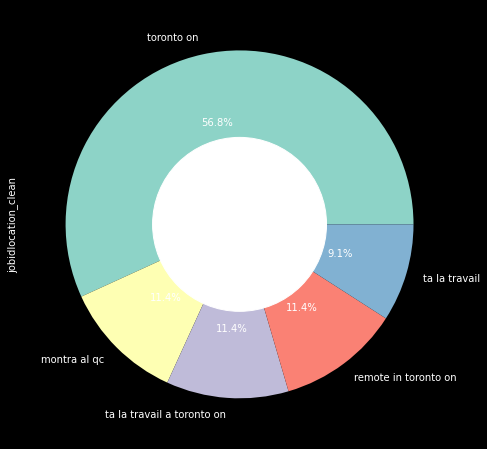

In [179]:
plt.figure(figsize=(10,8))
ca_de["jobidlocation_clean"].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 
# display the plot
plt.show()

In [180]:
## extract htbrid and remote info from jobid_location and create a new column
# remote and travail are both remote


from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

Hybride_remote= [
            'travail hybride','remote','travail']

ca_de["Hybride_remote"]=''

for i in Hybride_remote:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_de)):
    
    keywords_found = keyword_processor.extract_keywords(ca_de["jobidlocation_clean"][i])

    ca_de['Hybride_remote'][i]=keywords_found
    

<ipython-input-180-c011970db123>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_de['Hybride_remote'][i]=keywords_found


In [181]:
# reomve square bracket
ca_de['Hybride_remote']=ca_de['Hybride_remote'].astype(str).str.replace("[\]\[]",'')

ca_de['Hybride_remote'] = ca_de['Hybride_remote'].str.replace('travail','remote',regex=True)

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))

x=ca_de['Hybride_remote'].value_counts()

labels = ['on-site','remote','travail hybride']
plt.pie(x, explode=[0.0,0.1,0.2], autopct='%1.1f%%',labels=labels)
plt.legend(title = "Distribution on remote/hybride")

NameError: name 'ca_de' is not defined

<Figure size 720x576 with 0 Axes>

In [44]:
# extract degree info and create a new column

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

EDUCATION = [
            'BE','B.E.', 'B.E', 'BS', 'B.S','C.A.','c.a.','B.Com','B. Com','M. Com', 'M.Com','M. Com .',
            'ME', 'M.E', 'M.E.', 'MS', 'M.S','msc',
            'BTECH', 'B.TECH', 'M.TECH', 'MTECH',
            'PHD', 'phd', 'ph.d', 'Ph.D.','MBA','mba','graduate', 'post-graduate','5 year integrated masters','masters',
            'SSC', 'HSC', 'CBSE', 'ICSE', 'X', 'XII'
        ]

ca_de["education"]=''

for i in EDUCATION:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(ca_de)):
    
    keywords_found = keyword_processor.extract_keywords(ca_de["description_clean"][i])

    ca_de['education'][i]=keywords_found
    

<ipython-input-44-011b025fd9ad>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_de['education'][i]=keywords_found


In [45]:
# remove duplicate degree information in each position and remove "set()"


education_result=[]

for i in range(len(ca_de["education"])):
    
    
      item = set(ca_de["education"][i])
        
      for char in item:
    
            if item != "set()":
      
               education_result.append(item)

In [46]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


degree_count = {}

for w in education_result:
    
    for char in w:
    
        if char in degree_count:
        
             degree_count[char] += 1
        
        else:
        
              degree_count[char] = 1

In [47]:
# convert dictionary degreelist to dataframe type


degree_items = list(degree_count.items())

degree_list = pd.DataFrame(degree_items)

degree_list= degree_list.rename(columns={0:"degree",1:"count"}).reset_index().sort_values(by="count", ascending=False)


degree_list.drop(columns="index")

degree_items = list(degree_count.items())

,degree,count
0,BE,208
1,MS,53
3,BS,28
2,graduate,25
4,ME,21
5,masters,11
6,phd,3
7,msc,2
8,X,2


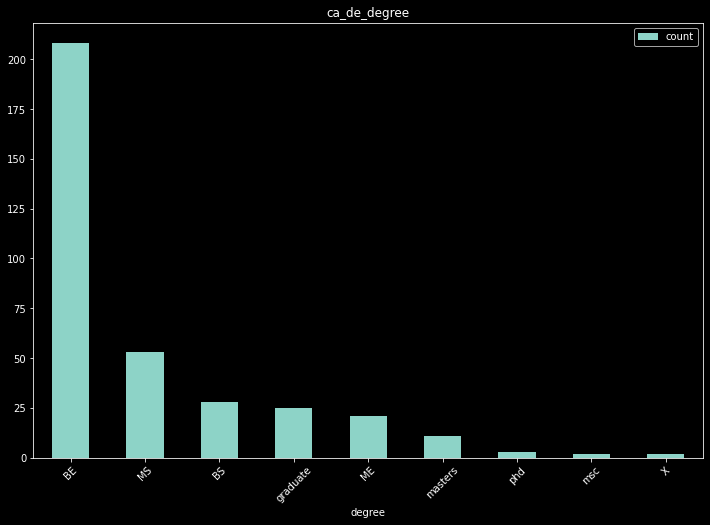

In [48]:
# plot the degree count 

degree_list.plot.bar(x="degree", y="count", figsize=(12,8), rot=45,title="ca_de_degree")


In [60]:
# major distribution

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

major = ["computer science", "statistics", "mathematics", "physics", "electrical engineering", "economics","computer engineering",
        "information systems","business", "management science", "mechanical engineering", "chemistry", "finance", "biology","psychology","Engineering",
        "information technology","industrial engineering","biomedical engineering","chemical engineering"]



ca_de["major"] = ''

for i in major:
    
    if i !=i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        

        
for i  in range(len(ca_de["description_clean"])):
    
    
    keyword_found = keyword_processor.extract_keywords(ca_de["description_clean"][i])
    
    
    ca_de['major'][i] = keyword_found

<ipython-input-60-a291ea6e77de>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_de['major'][i] = keyword_found


In [61]:
major_result=[]

for i in range(len(ca_de["major"])):
    
    
    item = set(ca_de["major"][i])
        
    for char in item:
    
            if item != "set()":
      
               major_result.append(item)

In [62]:

de_major_count = {}

for w in major_result:
    
    for char in w:
    
        if char in de_major_count:
        
             de_major_count[char] += 1
        
        else:
        
              de_major_count[char] = 1

In [63]:
# conver major count dictionary to datarame

major_items = list(de_major_count.items())

major_list = pd.DataFrame(major_items)


ca_de_major_list= major_list.rename(columns={0:"ca_de_major",1:"count"}).reset_index().sort_values(by="count",ascending=False)


ca_de_major_list=ca_de_major_list.drop(columns="index")
#ca_de_major_list.plot.bar(x="ca_de_major",y="count",figsize=(12,8),rot=30,color='red',title="ca_de_major")

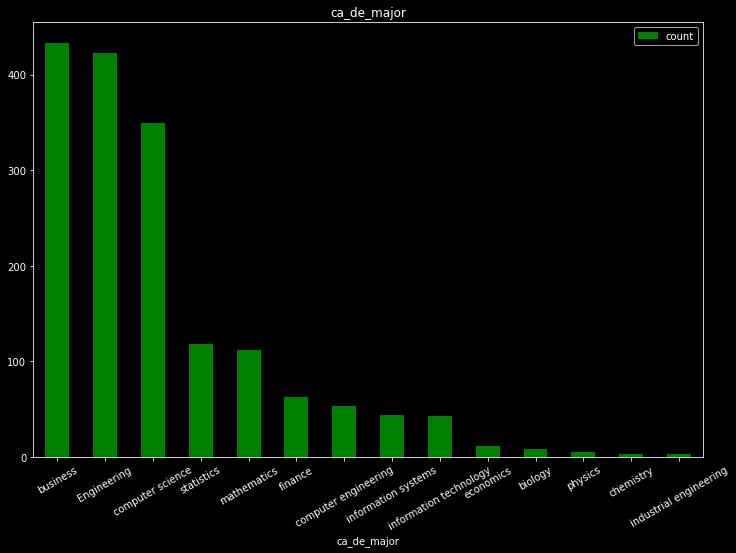

In [64]:
ca_de_major_list.plot.bar(x="ca_de_major",y="count",figsize=(12,8),rot=30,color='green',title="ca_de_major")

In [65]:
 # extract libraries for ca_data scientist

from flashtext import KeywordProcessor


keyword_processor = KeywordProcessor()


ds_libraries = ['NumPy','Keras','Pandas','PyTorch','SciPy','Scikit-Learn','TensorFlow','Matplotlib','Seaborn',
'Theano','OpenCV','Mahotas','SimpleITK','Pillow','Requests','Beautiful Soup','Selenium','ScraPy','PyTest','PyUnit']



ca_de["libraries"]=''

for i in ds_libraries:
    
    if i != i:
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_cloud["description_stop_re"][0])


for i in range(len(ca_de)):
    
    keywords_found = keyword_processor.extract_keywords(ca_de["description_clean"][i])
    
    ca_de["libraries"][i] = keywords_found
    

<ipython-input-65-156ad77a2d29>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_de["libraries"][i] = keywords_found


In [66]:
from nltk import flatten

uniqueskillcount=0
    
library_skill_list =[i for i in ca_de["libraries"]]
    
library_skill = list(flatten([q for q in library_skill_list]))



de_library_skill_count={}

for w in library_skill:
    
    if w in de_library_skill_count:
        
        de_library_skill_count[w] += 1
    else:
        
        de_library_skill_count[w] = 1
        
    

# convert dictionary soft skill list to dataframe type
library_items = list(de_library_skill_count.items())

library_list = pd.DataFrame(library_items)

cade_library_list= library_list.rename(columns={0:"library skill",1:"count"}).reset_index().sort_values(by="count",ascending=False)

cade_library_list.drop(columns="index")

,library skill,count
0,Requests,14
1,Pandas,11
7,NumPy,7
2,TensorFlow,6
4,PyTorch,4
8,SciPy,4
3,Keras,3
6,Selenium,3
5,ScraPy,2
9,Matplotlib,1


In [67]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


major_count = {}

for w in major_result:
    
    for char in w:
    
        if char in major_count:
        
             major_count[char] += 1
        
        else:
        
              major_count[char] = 1

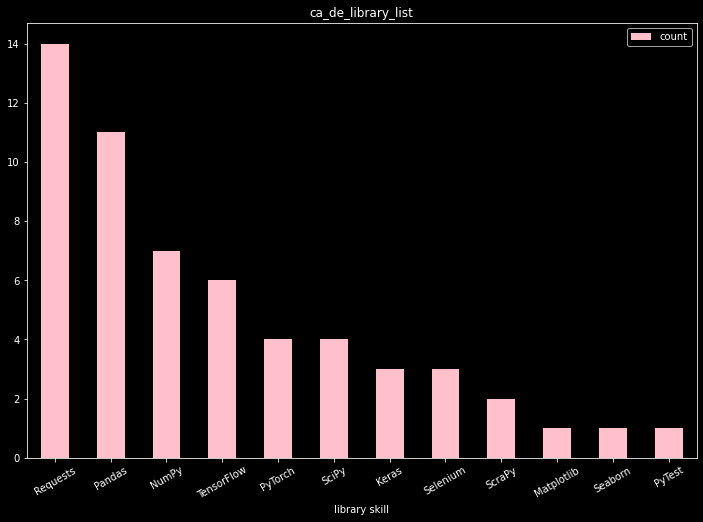

In [68]:
cade_library_list.plot.bar(x="library skill",y="count",figsize=(12,8),rot=30,color='pink',title="ca_de_library_list")

In [24]:
us_da_jd = pd.read_csv("/Users/xugao/Downloads/us_data%2Banalyst_jd15.csv")


In [25]:
us_da_id = pd.read_csv("/Users/xugao/Downloads/us_data%2Banalyst_jobids15.csv")


In [10]:
us_da_jd['jobid']=us_da_jd['url'].apply(lambda x : x.split("=")[1])
us_da=pd.merge(us_da_jd,us_da_id, how="left",on="jobid")
us_da.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

,url,description,jobid,jobid_location
0,https://www.indeed.com/viewjob?jk=4762cea6d145...,\n\nSummary\n Staff whose work requires or pot...,4762cea6d1458598,"Yucca Valley, CA 92284+2 locations"
1,https://www.indeed.com/viewjob?jk=f90a445f132b...,Position Web Analyst\nLocation Sunnyvale-CA\nD...,f90a445f132baea0,"Sunnyvale, CA"
2,https://www.indeed.com/viewjob?jk=519eff9ef9e1...,A Los Angeles based healthcare management comp...,519eff9ef9e10c71,"Los Angeles, CA 90010Â (Koreatown area)"
3,https://www.indeed.com/viewjob?jk=ed15bbd6c2b5...,"\n at Maravai LifeSciences \n \n San Diego, C...",ed15bbd6c2b5f01e,"San Diego, CA"
4,https://www.indeed.com/viewjob?jk=c9e6b1c87042...,\nIvy Energy is hiring for a Service Data Anal...,c9e6b1c87042c00b,"San Diego, CA"
...,...,...,...,...
471,https://www.indeed.com/viewjob?jk=a1342c4fe682...,\n\nTeam Name:\n\n Job Title: Senior Data/Repo...,a1342c4fe682af3e,"Irvine, CA 92618"
472,https://www.indeed.com/viewjob?jk=f8177577d09f...,\n\n\n\nJOB DESCRIPTION \nJob / Position Title...,f8177577d09f6373,"Anaheim, CA"
473,https://www.indeed.com/viewjob?jk=dd722d58aefe...,\nAs a company whose mission is to be the most...,dd722d58aefe721f,"Hybrid remote in Buena Park, CA 90621"
474,https://www.indeed.com/viewjob?jk=2fc31920fc01...,Job No: 524439 \n\nWork Type: Staff \n\nLocati...,2fc31920fc013292,"San Luis Obispo, CA 93407"


In [11]:
def cleaner(description):
    description= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", description) 
    
    description = re.sub(r"won\'t", "will not", description) # fix contractions
    description = re.sub(r"can\'t", "can not", description)
    description = re.sub(r"n\'t", " not", description)
    description = re.sub(r"\'re", " are", description)
    description = re.sub(r"\'s", " is", description)
    description = re.sub(r"\'d", " would", description)
    description = re.sub(r"\'ll", " will", description)
    description = re.sub(r"\'t", " not", description)
    description = re.sub(r"\'ve", " have", description)
    description = re.sub(r"\'m", " am", description)
    
    #description = re.sub(r"[^a-zA-z]", " ", description) 
    description = re.sub("(^|\W)\d+($|\W)", " ", description)  
    description= re.sub('\W+',' ',description)
    description = re.sub(r"\s+", " ", description) 
    description = description.lower()  
    description = description.strip() 
    description = re.sub(r"Ã","A",description)
    description = re.sub(r"ã","a",description)
    
    
    return description

us_da['description_clean']=us_da['description'].apply(cleaner)
us_da["jobidlocation_clean"]=us_da["jobid_location"].apply(cleaner)

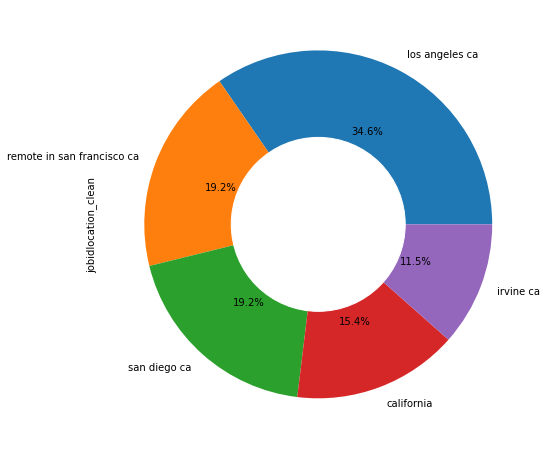

In [12]:
plt.figure(figsize=(10,8))
us_da["jobidlocation_clean"].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 
# display the plot
plt.show()

In [13]:
## extract htbrid and remote info from jobid_location and create a new column
# remote and travail are both remote


from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

Hybride_remote= [
            'travail hybride','remote','travail']

us_da["Hybride_remote"]=''

for i in Hybride_remote:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(us_da)):
    
    keywords_found = keyword_processor.extract_keywords(us_da["jobidlocation_clean"][i])

    us_da['Hybride_remote'][i]=keywords_found
    

<ipython-input-13-af119733d55a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_da['Hybride_remote'][i]=keywords_found


In [17]:
# reomve square bracket
us_da['Hybride_remote']=us_da['Hybride_remote'].astype(str).str.replace("[\]\[]",'')

us_da['Hybride_remote'] = us_da['Hybride_remote'].str.replace('travail','remote',regex=True)

In [20]:
us_da['Hybride_remote'].value_counts()

            368
'remote'    108
Name: Hybride_remote, dtype: int64

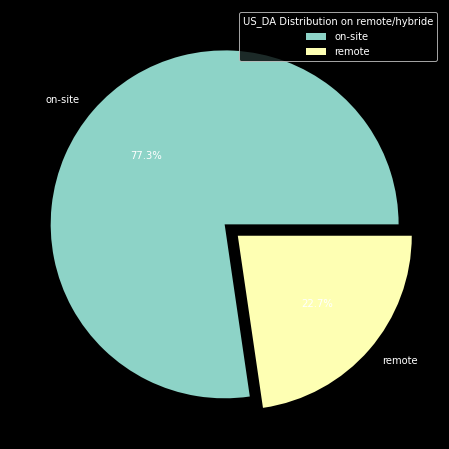

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))

x=us_da['Hybride_remote'].value_counts()

labels = ['on-site','remote']
plt.pie(x, explode=[0.0,0.1], autopct='%1.1f%%',labels=labels)
plt.legend(title = "US_DA Distribution on remote/hybride")

In [23]:
# extract degree info and create a new column

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

EDUCATION = [
            'BE','B.E.', 'B.E', 'BS', 'B.S','C.A.','c.a.','B.Com','B. Com','M. Com', 'M.Com','M. Com .',
            'ME', 'M.E', 'M.E.', 'MS', 'M.S','msc',
            'BTECH', 'B.TECH', 'M.TECH', 'MTECH',
            'PHD', 'phd', 'ph.d', 'Ph.D.','MBA','mba','graduate', 'post-graduate','5 year integrated masters','masters',
            'SSC', 'HSC', 'CBSE', 'ICSE', 'X', 'XII'
        ]

us_da["education"]=''

for i in EDUCATION:
    
    if i != i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_ds_jd["description_clean"][0])

for i in range(len(us_da)):
    
    keywords_found = keyword_processor.extract_keywords(us_da["description_clean"][i])

    us_da['education'][i]=keywords_found
    

<ipython-input-23-0fd3ab2a14d4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_da['education'][i]=keywords_found


In [26]:
# remove duplicate degree information in each position and remove "set()"


education_result=[]

for i in range(len(us_da["education"])):
    
    
      item = set(us_da["education"][i])
        
      for char in item:
    
            if item != "set()":
      
               education_result.append(item)

In [27]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


degree_count = {}

for w in education_result:
    
    for char in w:
    
        if char in degree_count:
        
             degree_count[char] += 1
        
        else:
        
              degree_count[char] = 1

In [28]:
# convert dictionary degreelist to dataframe type


degree_items = list(degree_count.items())

degree_list = pd.DataFrame(degree_items)

degree_list= degree_list.rename(columns={0:"degree",1:"count"}).reset_index().sort_values(by="count", ascending=False)


degree_list.drop(columns="index")

,degree,count
0,BE,552
1,MS,161
2,BS,105
3,graduate,46
7,masters,46
4,mba,24
8,phd,24
5,ME,17
6,X,16


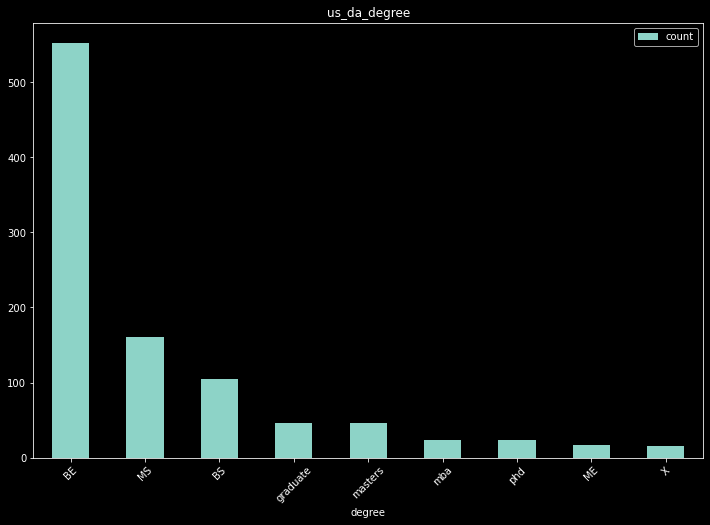

In [29]:
# plot the degree count 

degree_list.plot.bar(x="degree", y="count", figsize=(12,8), rot=45,title="us_da_degree")

In [30]:
# major distribution

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()

major = ["computer science", "statistics", "mathematics", "physics", "electrical engineering", "economics","computer engineering",
        "information systems","business", "management science", "mechanical engineering", "chemistry", "finance", "biology","psychology","Engineering",
        "information technology","industrial engineering","biomedical engineering","chemical engineering"]



us_da["major"] = ''

for i in major:
    
    if i !=i:
        
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        

        
for i  in range(len(us_da["description_clean"])):
    
    
    keyword_found = keyword_processor.extract_keywords(us_da["description_clean"][i])
    
    
    us_da['major'][i] = keyword_found

<ipython-input-30-9f28112e5cf6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_da['major'][i] = keyword_found


In [42]:
# remove the outer list and count the numbers of different degrees 
#and save to a dictionary


major_result=[]

for i in range(len(us_da["major"])):
    
    
    item = set(us_da["major"][i])
        
    for char in item:
    
            if item != "set()":
      
               major_result.append(item)

In [46]:
da_major_count = {}

for w in major_result:
    
    for char in w:
    
        if char in da_major_count:
        
             da_major_count[char] += 1
        
        else:
        
              da_major_count[char] = 0

In [50]:
# conver major count dictionary to datarame

major_items = list(da_major_count.items())

major_list = pd.DataFrame(major_items)


us_da_major_list= major_list.rename(columns={0:"us_da_major",1:"count"}).reset_index().sort_values(by="count",ascending=False)


us_da_major_list=us_da_major_list.drop(columns="index")
#ca_de_major_list.plot.bar(x="ca_de_major",y="count",figsize=(12,8),rot=30,color='red',title="ca_de_major")

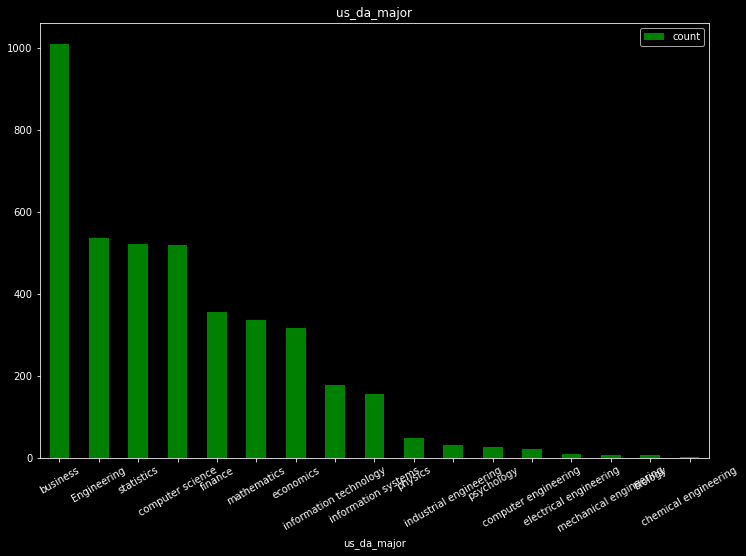

In [51]:
us_da_major_list.plot.bar(x="us_da_major",y="count",figsize=(12,8),rot=30,color='green',title="us_da_major")

In [52]:
 # extract libraries for ca_data scientist

from flashtext import KeywordProcessor


keyword_processor = KeywordProcessor()


ds_libraries = ['NumPy','Keras','Pandas','PyTorch','SciPy','Scikit-Learn','TensorFlow','Matplotlib','Seaborn',
'Theano','OpenCV','Mahotas','SimpleITK','Pillow','Requests','Beautiful Soup','Selenium','ScraPy','PyTest','PyUnit']



us_da["libraries"]=''

for i in ds_libraries:
    
    if i != i:
        pass
    
    else:
        
        keyword_processor.add_keyword(i)
        
#keywords_found = keyword_processor.extract_keywords(ca_cloud["description_stop_re"][0])


for i in range(len(us_da)):
    
    keywords_found = keyword_processor.extract_keywords(us_da["description_clean"][i])
    
    us_da["libraries"][i] = keywords_found
    

<ipython-input-52-982d18c6ebb4>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_da["libraries"][i] = keywords_found


In [53]:
from nltk import flatten

uniqueskillcount=0
    
library_skill_list =[i for i in us_da["libraries"]]
    
library_skill = list(flatten([q for q in library_skill_list]))



da_library_skill_count={}

for w in library_skill:
    
    if w in da_library_skill_count:
        
        da_library_skill_count[w] += 1
    else:
        
        da_library_skill_count[w] = 1
        
    

# convert dictionary soft skill list to dataframe type
library_items = list(da_library_skill_count.items())

library_list = pd.DataFrame(library_items)

usda_library_list= library_list.rename(columns={0:"library skill",1:"count"}).reset_index().sort_values(by="count",ascending=False)

usda_library_list.drop(columns="index")

,library skill,count
0,Requests,133
1,Pandas,9
3,Matplotlib,3
2,Seaborn,2
4,TensorFlow,2
5,NumPy,2
6,PyTest,1
7,PyTorch,1


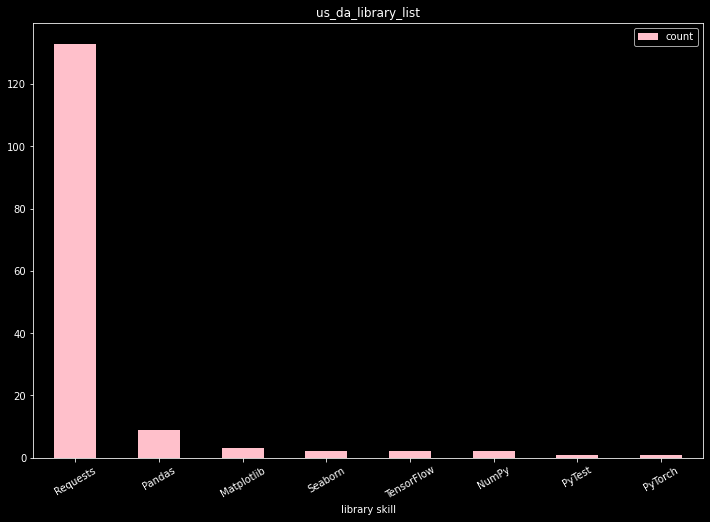

In [55]:
usda_library_list.plot.bar(x="library skill",y="count",figsize=(12,8),rot=30,color='pink',title="us_da_library_list")

## Create the additional columns
## Job title (One of the 4 listed above)
## city
## State/Province
## Country,Remote (binary)Hybrid (binary) On-site (binary)